In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: GeForce GTX 1650


In [2]:
import pickle
import os
from source import config, train, eval
from source.model import ModelClass, DatasetClass

In [3]:
RUN_NAME = 'tayga_upos_skipgram_300_2_2019'
workdir = ''
with open('data/label_weights.pkl', 'rb') as f:
        class_weights = pickle.load(f)
config = config.get_config(workdir, num_classes=len(class_weights), weigths=list(class_weights.values()), batch_size=64)
model = train.run_training(ModelClass, config, run_name=RUN_NAME)

93it/s, loss=4.256, v_num=1kn8kcnf]
Epoch 5: 100%|██████████| 4482/4482 [25:40<00:00,  2.91it/s, loss=4.256, v_num=1kn8kcnf]

Epoch 00004: val_epoch_auc reached 0.65865 (best 0.65865), saving model to /home/satellite/Documents/python_workdir/netology_learning/deep-nlp-spring-2020/ODS-QA/models_code/w2v_lin/wandb/run-20200724_181404-1kn8kcnf/tayga_upos_skipgram_300_2_2019_epoch=4-val_epoch_auc=0.66.ckpt as top 1
wandb: WARNING Adding to old History rows isn't currently supported.  Step 16804 < 17915; dropping {'train_loss': 4.244009494781494, 'epoch': 4}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 16805 < 17915; dropping {'train_epoch_loss': 4.274137496948242, 'epoch': 4}.
Epoch 5: 100%|██████████| 4482/4482 [25:41<00:00,  2.91it/s, loss=4.256, v_num=1kn8kcnf]
Run pip install nbformat to save notebook history


Predicting on cuda:   0%|          | 0/5974 [00:00<?, ?it/s]
Loading the model...
Predicting on cuda: 100%|██████████| 5974/5974 [07:50<00:00, 12.71it/s]
Macro ROC-AUC = 0.6509359111058881


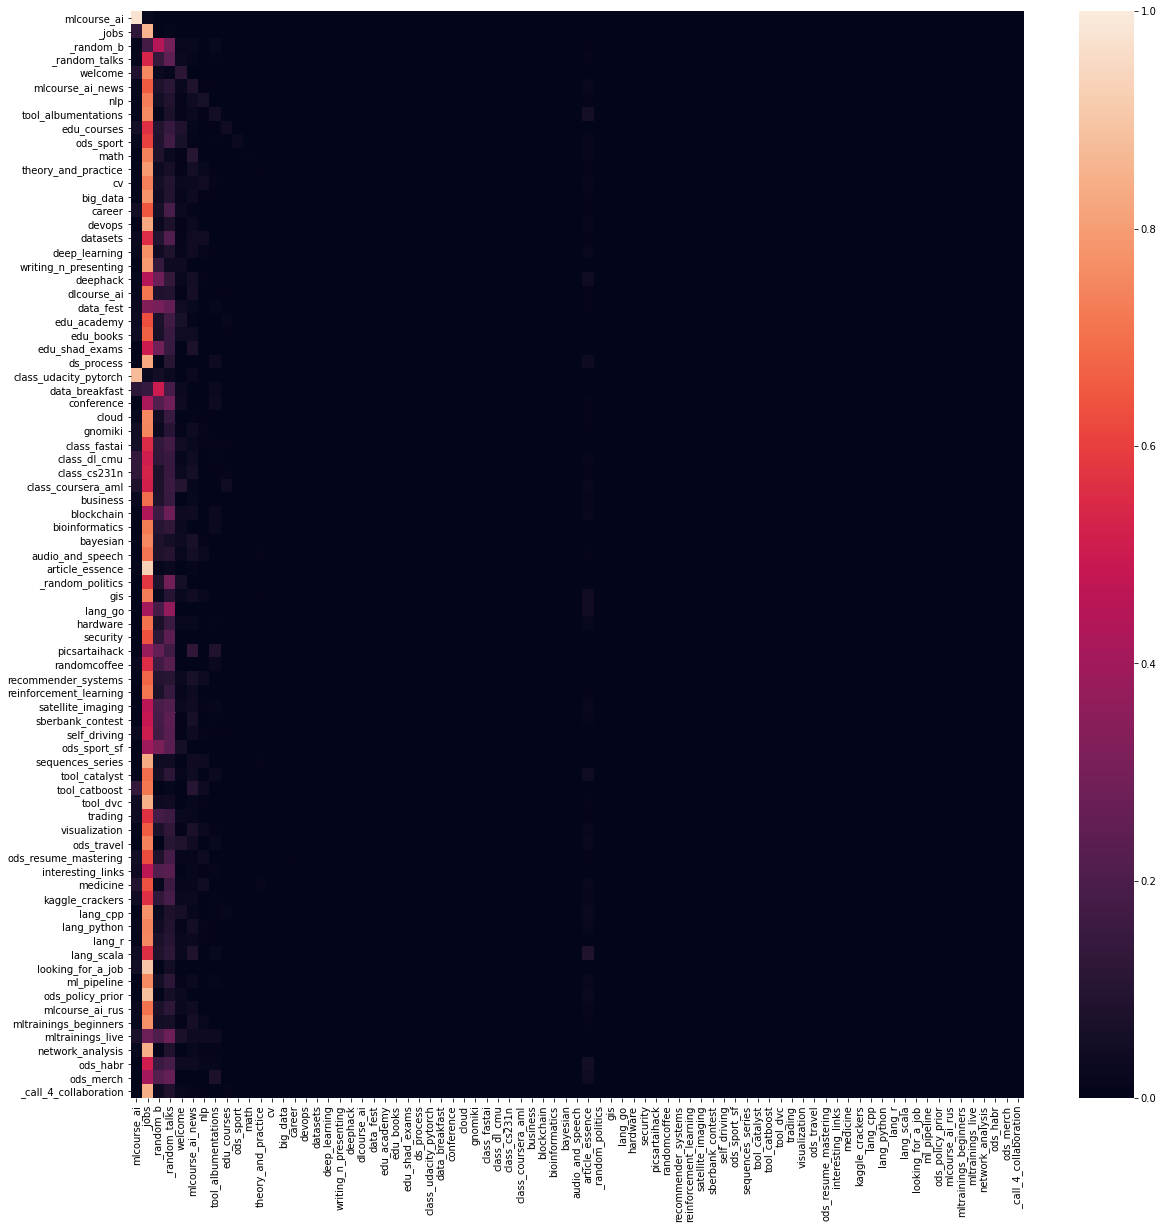

In [4]:
eval.evaluate(model, workdir, RUN_NAME)